In [1]:
import numpy as np
import pandas as pd
from graspy.utils import * 
from graspy.plot import heatmap, pairplot, gridplot
from graspy.embed import *
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
import networkx as nx
from pathlib import Path
from sklearn.utils.graph_shortest_path import graph_shortest_path
%matplotlib inline

In [2]:
basedir = Path('../../../eleGraSPy')
basedir = basedir / 'Cook et al revised Supplementary Information'
matdir = basedir / 'SI 5 Connectome adjacency matrices Pedigo.xlsx'
celldir = basedir / 'herm_cell_list_pedigo.xlsx'

In [3]:
def emmons_excel_to_df(matdir, sheet_name):
    df = pd.read_excel(matdir, sheet_name=sheet_name)
    # get the in / out cells
    # have to append some 0s to make into a square matrix
    outs = df.index.values
    ins = df.columns.values
    not_outs = np.setdiff1d(ins, outs)
    not_outs_df = pd.DataFrame(columns=df.columns)
    temp = np.empty((len(not_outs), len(ins)))
    temp[:] = 0
    not_outs_df = pd.DataFrame(temp)
    not_outs_df.columns = df.columns
    not_outs_df.index = not_outs
    df_full = pd.concat([df, not_outs_df])
    # reindex so that indices on matrices mean the same thing
    df_full = df_full.reindex(list(ins))
    return df_full

In [26]:
# get the excels as data frames, and add the missing values
herm_chem_df_full = emmons_excel_to_df(matdir, sheet_name=0)
#herm_chem_A_full = herm_chem_df_full.values

In [27]:
# get directed and undirected graphs 
g = nx.DiGraph()
herm_chem_g = nx.from_pandas_adjacency(herm_chem_df_full, create_using=g)
herm_chem_A_full = nx.to_numpy_array(herm_chem_g)

# Scott's cell metadata
cell_info = pd.read_excel(celldir, sheet_name=0)
cell_names = cell_info.index.values
cell_types1 = cell_info.loc[herm_cells, 'type1'].values
cell_types2 = cell_info.loc[herm_cells, 'type2'].values

In [31]:
#herm_chem_A_full = full adjacency matrix (453,453)
#herm_chem_A_self = Weighted adjacency matrix of lcc (446,446)
#herm_self_inds = matrix indices from input
herm_chem_A_self, herm_self_inds = get_lcc(herm_chem_A_full, return_inds=True)
#herm_cells = vertex anatomical labels
_, herm_cells = get_lcc(herm_chem_g, return_inds=True)

In [36]:
#def get_subgraph(start_nodes,end_nodes,adj):
herm_chem_lcc = nx.from_numpy_matrix(herm_chem_A_self,create_using=nx.DiGraph)
herm_chem_lcc_ud = nx.from_numpy_matrix(herm_chem_A_self,create_using=nx.Graph)

In [ ]:
sensors = [i for i,name in enumerate(herm_cells) for t1,t2 in cell_info[cell_info.index == name].values if t1 == 'sensory']
end_organs = [i for i,name in enumerate(herm_cells) for t1,t2 in cell_info[cell_info.index == name].values if t1=='endorgan' and not t2=='neuron']
endorgans_sex = [i for i,name in enumerate(herm_cells) for t1,t2 in cell_info[cell_info.index == name].values if t1 == 'endorgan' and 'sex' in t2]

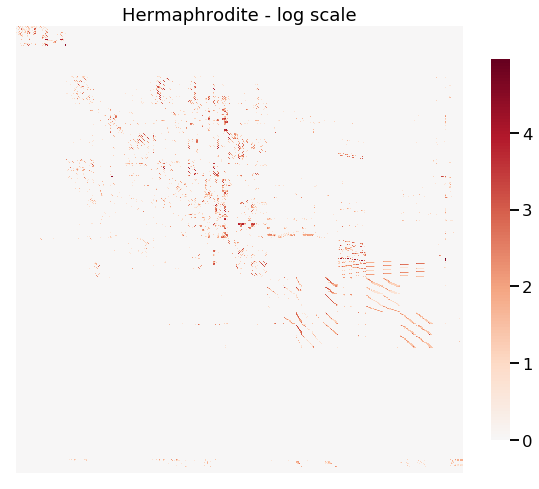

In [38]:
heatmap(herm_chem_lcc,
        transform='log',
        title='Hermaphrodite - log scale')

In [41]:
lse = LaplacianSpectralEmbed()
Xhat = lse.fit_transform(herm_chem_lcc_ud)

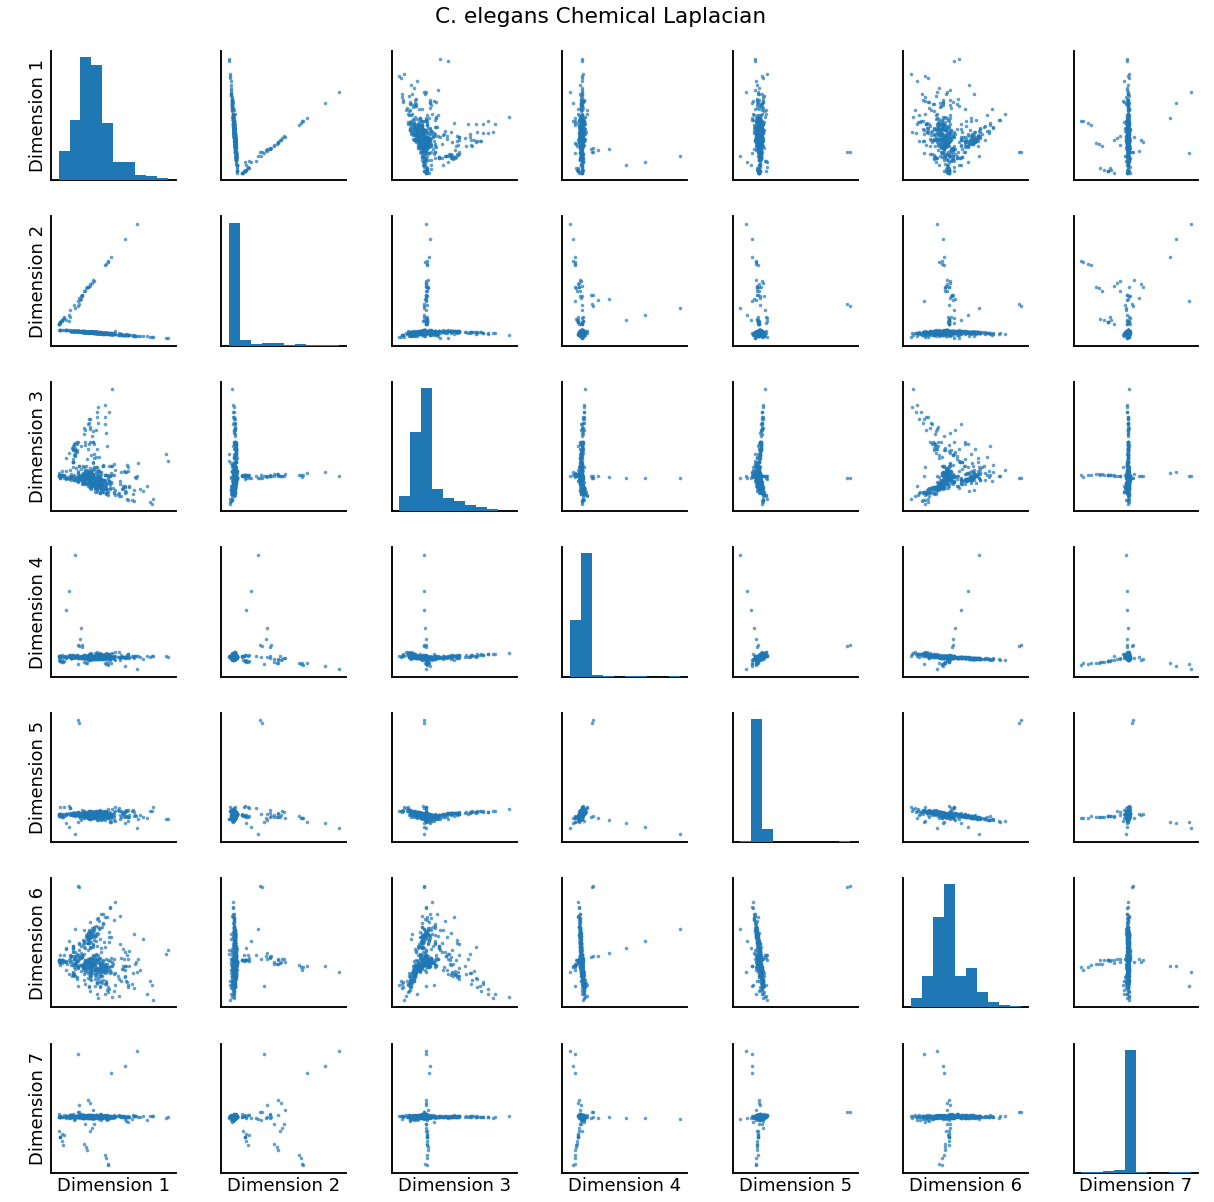

In [43]:
pairplot(Xhat, title='C. elegans Chemical Laplacian')